<p>Peter has nine four-sided (pyramidal) dice, each with faces numbered $1, 2, 3, 4$.<br>
Colin has six six-sided (cubic) dice, each with faces numbered $1, 2, 3, 4, 5, 6$.</p>

<p>Peter and Colin roll their dice and compare totals: the highest total wins. The result is a draw if the totals are equal.</p>

<p>What is the probability that Pyramidal Peter beats Cubic Colin? Give your answer rounded to seven decimal places in the form 0.abcdefg.</p>

In [1]:
'''
- problem will express probability distributions with args (n, k), where
an (n) amount of (k)-sided dice are thrown for each sample/event

- consider coins, where k = 2, increments of n + 1 coins yields terms of a
binomial distribution, represented compactly with Pascal's Triangle:

n = 2: result_sum = {2: (1,1); 3: (2,1),(1,2); 4: (2, 2)} -> 1,2,1
n = 3: result_sum -> 1,3,3,1
n = 4: result_sum -> 1,4,6,4,1
n = 5: result_sum -> 1,5,10,10,5,1

- how can a pattern be derived for cases k = 4,6? we can try a Monte Carlo simulation
of the frequency of sums thrown by n k-sided dice

- note that a precision of 7 decimal places yields a sample size of a Monte Carlo
simulation to be upwards of around 10 million events
'''

"\n- problem will express probability distributions with args (n, k), where\nan (n) amount of (k)-sided dice are thrown for each sample/event\n\n- consider coins, where k = 2, increments of n + 1 coins yields terms of a\nbinomial distribution, represented compactly with Pascal's Triangle:\n\nn = 2: result_sum = {2: (1,1); 3: (2,1),(1,2); 4: (2, 2)} -> 1,2,1\nn = 3: result_sum -> 1,3,3,1\nn = 4: result_sum -> 1,4,6,4,1\nn = 5: result_sum -> 1,5,10,10,5,1\n\n- how can a pattern be derived for cases k = 4,6? we can try a Monte Carlo simulation\nof the frequency of sums thrown by n k-sided dice\n\n- note that a precision of 7 decimal places yields a sample size of a Monte Carlo\nsimulation to be upwards of around 10 million events\n"

In [2]:
from collections import Counter

import random
import numpy as np
import matplotlib.pyplot as plt

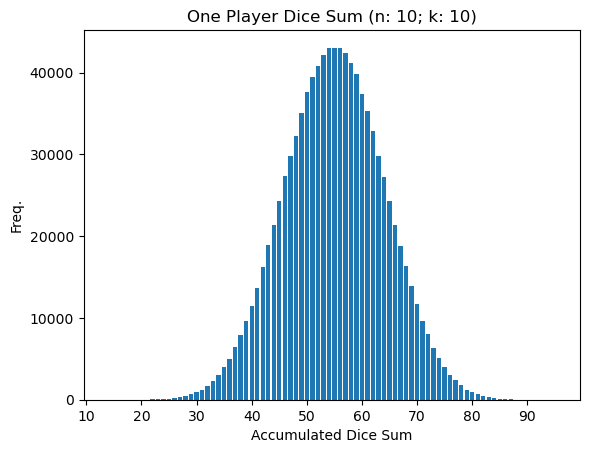

In [3]:
# MONTE CARLO MAIN LOOP

N: int = 10
K: int = 10

SAMPLE_MAX: int = 1000000

if __name__ == "__main__":
    dice_arr: list = [[k + 1 for k in range(0, K)] for _ in range(0, N)]
    sum_arr: list = []
    
    for _ in range(0, SAMPLE_MAX):
        temp_sum: int = 0
        for dice in dice_arr:
            temp_sum += random.choice(dice)
        sum_arr.append(temp_sum)
    
    count = Counter(sum_arr)
    plt.title("One Player Dice Sum (n: 10; k: 10)")
    plt.xlabel("Accumulated Dice Sum")
    plt.ylabel("Freq.")
    plt.bar(count.keys(), count.values())
    plt.show()

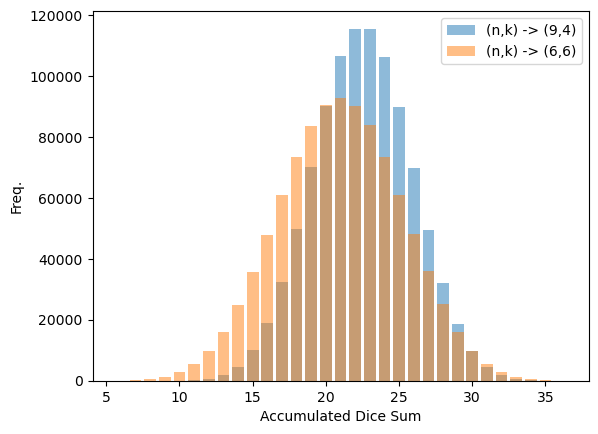

In [4]:
# MONTE CARLO MAIN LOOP
# FOR 2 PLAYERS
# TODO: Empirical math befind comparing two distributions
# - CDF's, KL-Divergence ?

N1: int = 9
K1: int = 4

N2: int = 6
K2: int = 6

SAMPLE_MAX: int = 1000000

if __name__ == "__main__":
    dice_arr1: list = [[k + 1 for k in range(0, K1)] for _ in range(0, N1)]
    dice_arr2: list = [[k + 1 for k in range(0, K2)] for _ in range(0, N2)]
    sum_arr1: list = []
    sum_arr2: list = []
    
    for _ in range(0, SAMPLE_MAX):
        temp_sum1: int = 0
        #-player 1: guy with 9 4-sided dice
        for dice in dice_arr1:
            temp_sum1 += random.choice(dice)
        temp_sum2: int = 0
        #-player 1: guy with 6 6-sided dice
        for dice in dice_arr2:
            temp_sum2 += random.choice(dice)
        sum_arr1.append(temp_sum1)
        sum_arr2.append(temp_sum2)
    count1 = Counter(sum_arr1)
    count2 = Counter(sum_arr2)

    plt.xlabel("Accumulated Dice Sum")
    plt.ylabel("Freq.")
    plt.bar(count1.keys(), count1.values(), label = "(n,k) -> (9,4)", alpha = 0.5)
    plt.bar(count2.keys(), count2.values(), label = "(n,k) -> (6,6)", alpha = 0.5)
    plt.legend()
    plt.show()

In [5]:
'''
- there is a mathematical solution regarding the indepedent probabilities
for each point in both X, Y distributions:
- https://robguzmantechblog.wordpress.com/2014/07/12/project-euler-205-dice-game/

- I would like to see if a solution can be gathered using a purely 
Monte Carlo based approach
'''

# this test only counts the number of wins of player 1 (n,k) = (9,4)

import random

N1: int = 9
K1: int = 4

N2: int = 6
K2: int = 6

SAMPLE_MAX: int = 10000

if __name__ == "__main__":
    dice_arr1: list = [[k + 1 for k in range(0, K1)] for _ in range(0, N1)]
    dice_arr2: list = [[k + 1 for k in range(0, K2)] for _ in range(0, N2)]
    
    for trial in range(0, 50):
        win1_count: int = 0 #-number of wins accumulated by player 1
        for _ in range(0, SAMPLE_MAX):
            temp_sum1: int = 0
            #-player 1: guy with 9 4-sided dice
            for dice in dice_arr1:
                temp_sum1 += random.choice(dice)
            temp_sum2: int = 0
            #-player 1: guy with 6 6-sided dice
            for dice in dice_arr2:
                temp_sum2 += random.choice(dice)
            if temp_sum1 > temp_sum2:
                win1_count += 1
        print("Player 1 Win Probability - Trial {0}: {1}".format(trial, win1_count / SAMPLE_MAX))

Player 1 Win Probability - Trial 0: 0.5714
Player 1 Win Probability - Trial 1: 0.5682
Player 1 Win Probability - Trial 2: 0.5748
Player 1 Win Probability - Trial 3: 0.5688
Player 1 Win Probability - Trial 4: 0.5708
Player 1 Win Probability - Trial 5: 0.5704
Player 1 Win Probability - Trial 6: 0.5748
Player 1 Win Probability - Trial 7: 0.5697
Player 1 Win Probability - Trial 8: 0.5778
Player 1 Win Probability - Trial 9: 0.5674
Player 1 Win Probability - Trial 10: 0.5743
Player 1 Win Probability - Trial 11: 0.5797
Player 1 Win Probability - Trial 12: 0.5758
Player 1 Win Probability - Trial 13: 0.5781
Player 1 Win Probability - Trial 14: 0.5705
Player 1 Win Probability - Trial 15: 0.5755
Player 1 Win Probability - Trial 16: 0.5781
Player 1 Win Probability - Trial 17: 0.5771
Player 1 Win Probability - Trial 18: 0.5823
Player 1 Win Probability - Trial 19: 0.5705
Player 1 Win Probability - Trial 20: 0.578
Player 1 Win Probability - Trial 21: 0.5745
Player 1 Win Probability - Trial 22: 0.5728

In [6]:
'''
- for 10 million samples, 10 trials
Player 1 Win Probability - Trial 0: 0.5730515
Player 1 Win Probability - Trial 1: 0.5733383
Player 1 Win Probability - Trial 2: 0.5732534
Player 1 Win Probability - Trial 3: 0.5731147
Player 1 Win Probability - Trial 4: 0.573295
Player 1 Win Probability - Trial 5: 0.5731773
Player 1 Win Probability - Trial 6: 0.5730291
Player 1 Win Probability - Trial 7: 0.5731501
Player 1 Win Probability - Trial 8: 0.5731174
Player 1 Win Probability - Trial 9: 0.5730064

- for 10 million samples, 50 trials
Player 1 Win Probability - Trial 0: 0.5733401
Player 1 Win Probability - Trial 1: 0.5730215
Player 1 Win Probability - Trial 2: 0.5732756
Player 1 Win Probability - Trial 3: 0.5731063
Player 1 Win Probability - Trial 4: 0.5729068
Player 1 Win Probability - Trial 5: 0.5733559
Player 1 Win Probability - Trial 6: 0.573394
Player 1 Win Probability - Trial 7: 0.5729432
Player 1 Win Probability - Trial 8: 0.5727794
Player 1 Win Probability - Trial 9: 0.5732143
Player 1 Win Probability - Trial 10: 0.5728761
Player 1 Win Probability - Trial 11: 0.5732025
Player 1 Win Probability - Trial 12: 0.5732797
Player 1 Win Probability - Trial 13: 0.5734494
Player 1 Win Probability - Trial 14: 0.5732513
Player 1 Win Probability - Trial 15: 0.5734195
Player 1 Win Probability - Trial 16: 0.5730752
Player 1 Win Probability - Trial 17: 0.5731508
Player 1 Win Probability - Trial 18: 0.5730142
Player 1 Win Probability - Trial 19: 0.573063
Player 1 Win Probability - Trial 20: 0.5733734
Player 1 Win Probability - Trial 21: 0.5726247
Player 1 Win Probability - Trial 22: 0.5729452
Player 1 Win Probability - Trial 23: 0.5731221
Player 1 Win Probability - Trial 24: 0.573133
Player 1 Win Probability - Trial 25: 0.5733923
Player 1 Win Probability - Trial 26: 0.5733416
Player 1 Win Probability - Trial 27: 0.5732991
Player 1 Win Probability - Trial 28: 0.5731158
Player 1 Win Probability - Trial 29: 0.5729059
Player 1 Win Probability - Trial 30: 0.5731957
Player 1 Win Probability - Trial 31: 0.5733351
Player 1 Win Probability - Trial 32: 0.5730922
Player 1 Win Probability - Trial 33: 0.573209
Player 1 Win Probability - Trial 34: 0.5731611
Player 1 Win Probability - Trial 35: 0.5731311
Player 1 Win Probability - Trial 36: 0.5729541
Player 1 Win Probability - Trial 37: 0.5735045
Player 1 Win Probability - Trial 38: 0.5729737
Player 1 Win Probability - Trial 39: 0.5734375
Player 1 Win Probability - Trial 40: 0.573167
Player 1 Win Probability - Trial 41: 0.5731966
Player 1 Win Probability - Trial 42: 0.5731501
Player 1 Win Probability - Trial 43: 0.5730553
Player 1 Win Probability - Trial 44: 0.5729098
Player 1 Win Probability - Trial 45: 0.5731476
Player 1 Win Probability - Trial 46: 0.5732088
Player 1 Win Probability - Trial 47: 0.5733389
Player 1 Win Probability - Trial 48: 0.5728841
Player 1 Win Probability - Trial 49: 0.573171
'''

print("TODO...")

TODO...
